# Damped Harmonic Oscillator & Numerical Integration

An example of a damped harmonic oscillator could be a mass attached to a spring having some friction directly proportinal to the speed of the mass. This movement can be described by the equation:

\begin{equation}
\frac{d^2 x}{d^2 t} + \frac{\mu}{m} \frac{d x}{d t} + \frac{k}{m}x = 0
\end{equation}

Where $x$ is the mass position and $t$ is the time. The other constants are:

* $\mu$ is the friction coefficient
* $m$ is the oscillating mass
* $k$ is the spring constant

A more convenien equation is:

\begin{equation}
\ddot{x} + \frac{\mu}{m} \dot{x} + \frac{k}{m}x = 0
\end{equation}

where each dot indicates a derivative w.r.t time

## Exact solution for damped harmonic oscillator

The previous equation can be solved analytically. This is:

\begin{equation}
x(t) = x_0 e^{-\delta t} \left[\cos(\omega t)  + \frac{\delta}{\omega} \sin(\omega t)\right]
\end{equation}

where we have considered the initial conditions

* $x_0 = x(0)$, i.e. $x_0$ is the position at time 0
* $\dot{x}(0) = 0$ i.e. speed at time 0 is zero (particle begins stopped).

The other constants are:

\begin{eqnarray*}
\delta&=&\frac{\mu}{2m},\\
\omega_0&=&\sqrt{\frac{k}{2m}},\\
\omega &=& \sqrt{\omega_0^2 - \delta^2}
\end{eqnarray*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

mu = 0.1
m = 0.5
k = 0.3

x0 = 1 #position at time 0
v0 = 0 #speed at time 0
tf = 60 #finishing plotting time
t0 = 0

def x_exact(t,x0 = x0):
    delta = mu/(2*m)
    omega_0 = np.sqrt(k/m)
    omega = np.sqrt(omega_0*omega_0 - delta*delta)
    
    x = np.cos(omega*t) + delta/omega*np.sin(omega*t)
    x *= x0*np.exp(-delta*t)
    
    return x

#generate the data
t_analytic = np.linspace(0,60,1000)
x_analytic = np.array([x_exact(i) for i in t_analytic])

<IPython.core.display.Javascript object>


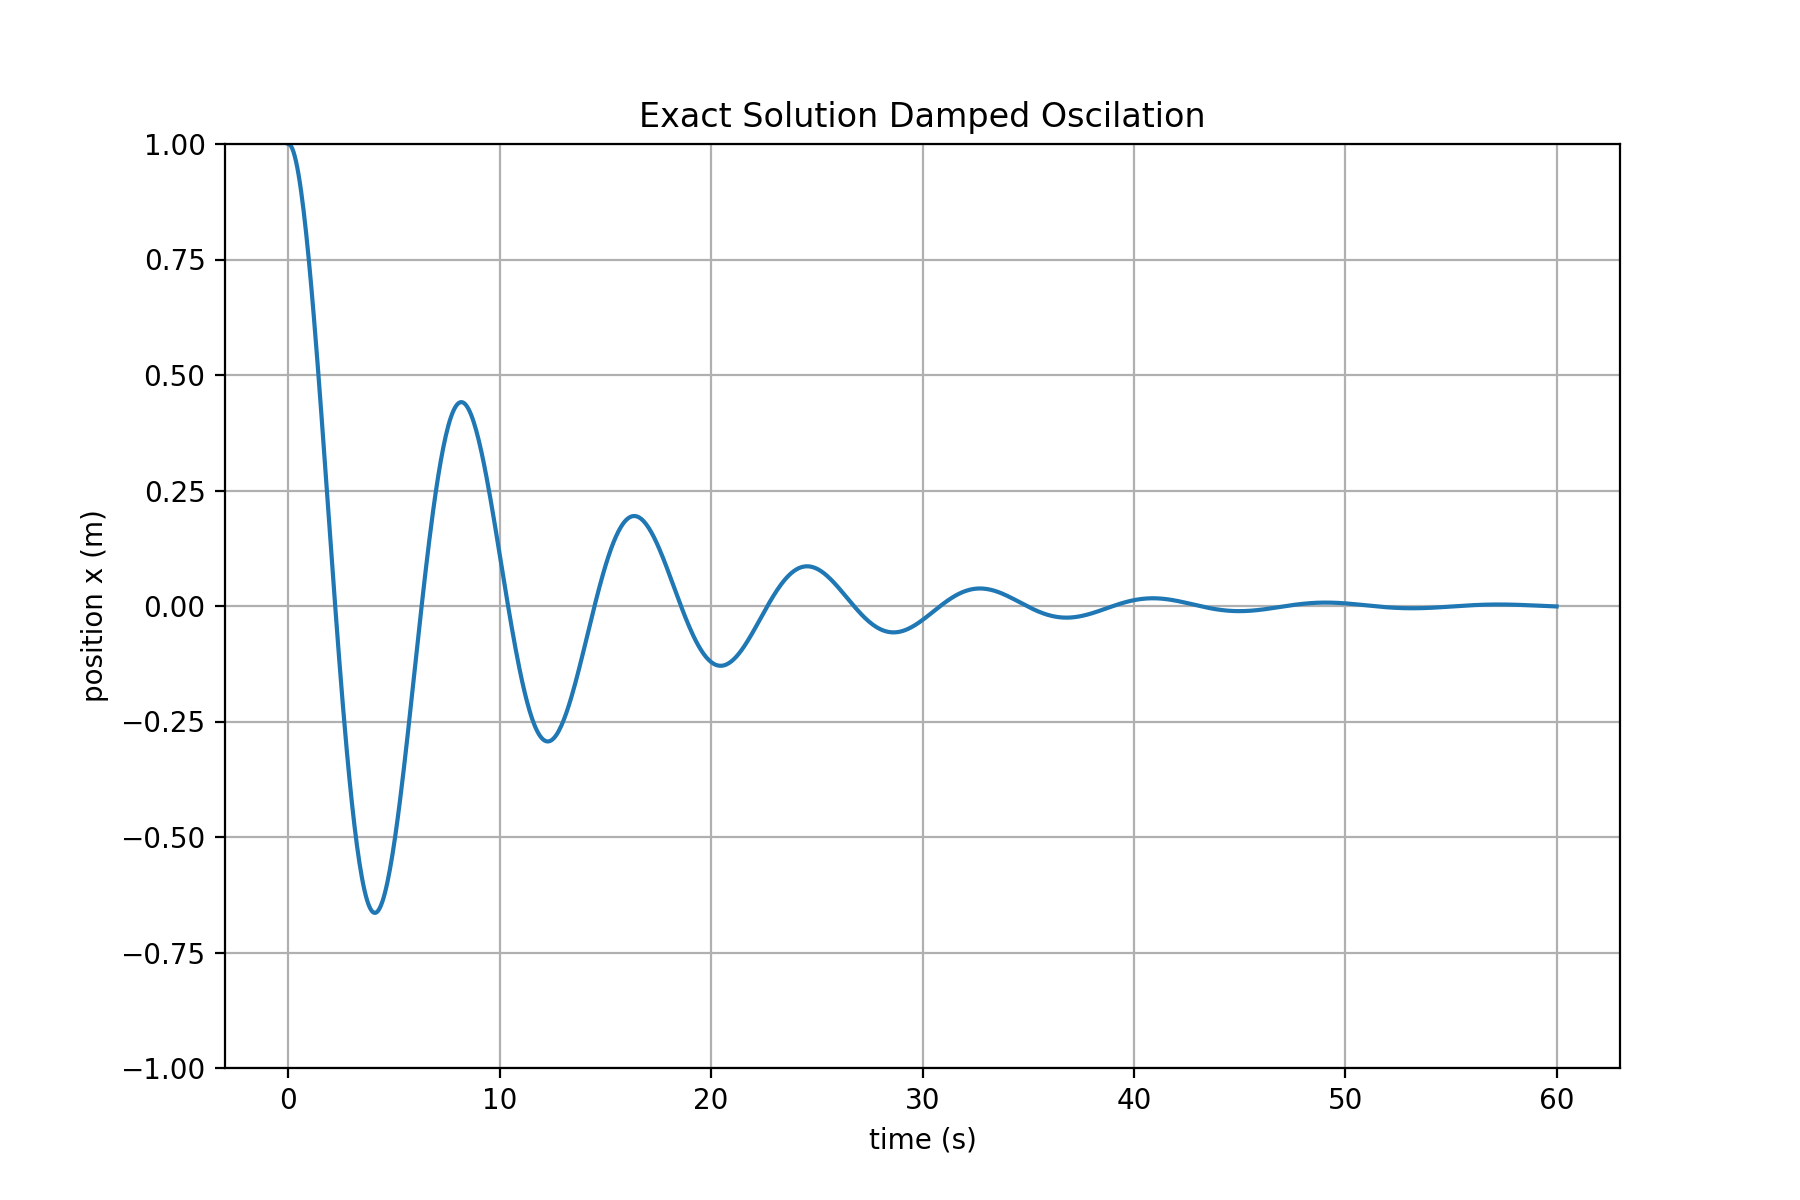

In [2]:
#plt.clf()

fig = plt.figure(figsize=(9,6))
plt.title("Exact Solution Damped Oscilation")

#fig, ax = plt.subplots(1, figsize=(9, 6))
#ax = fig.add_subplot(1,1,1, title="Damping exact solution")
plt.grid()
plt.ylim(-1,1)

plt.ylabel("position x (m)")
plt.xlabel("time (s)")

plt.plot(t_analytic,x_analytic)

To understand this graph just look at the solution equation. Inside the brackets there's a $\sin$ and $\cos$ with different amplitudes but the same frequency $\omega$. This is simply an oscillating function with amplitude maximum. I just make a plot now of the sum of the terms inside the brackets of the equation to check this:

<IPython.core.display.Javascript object>


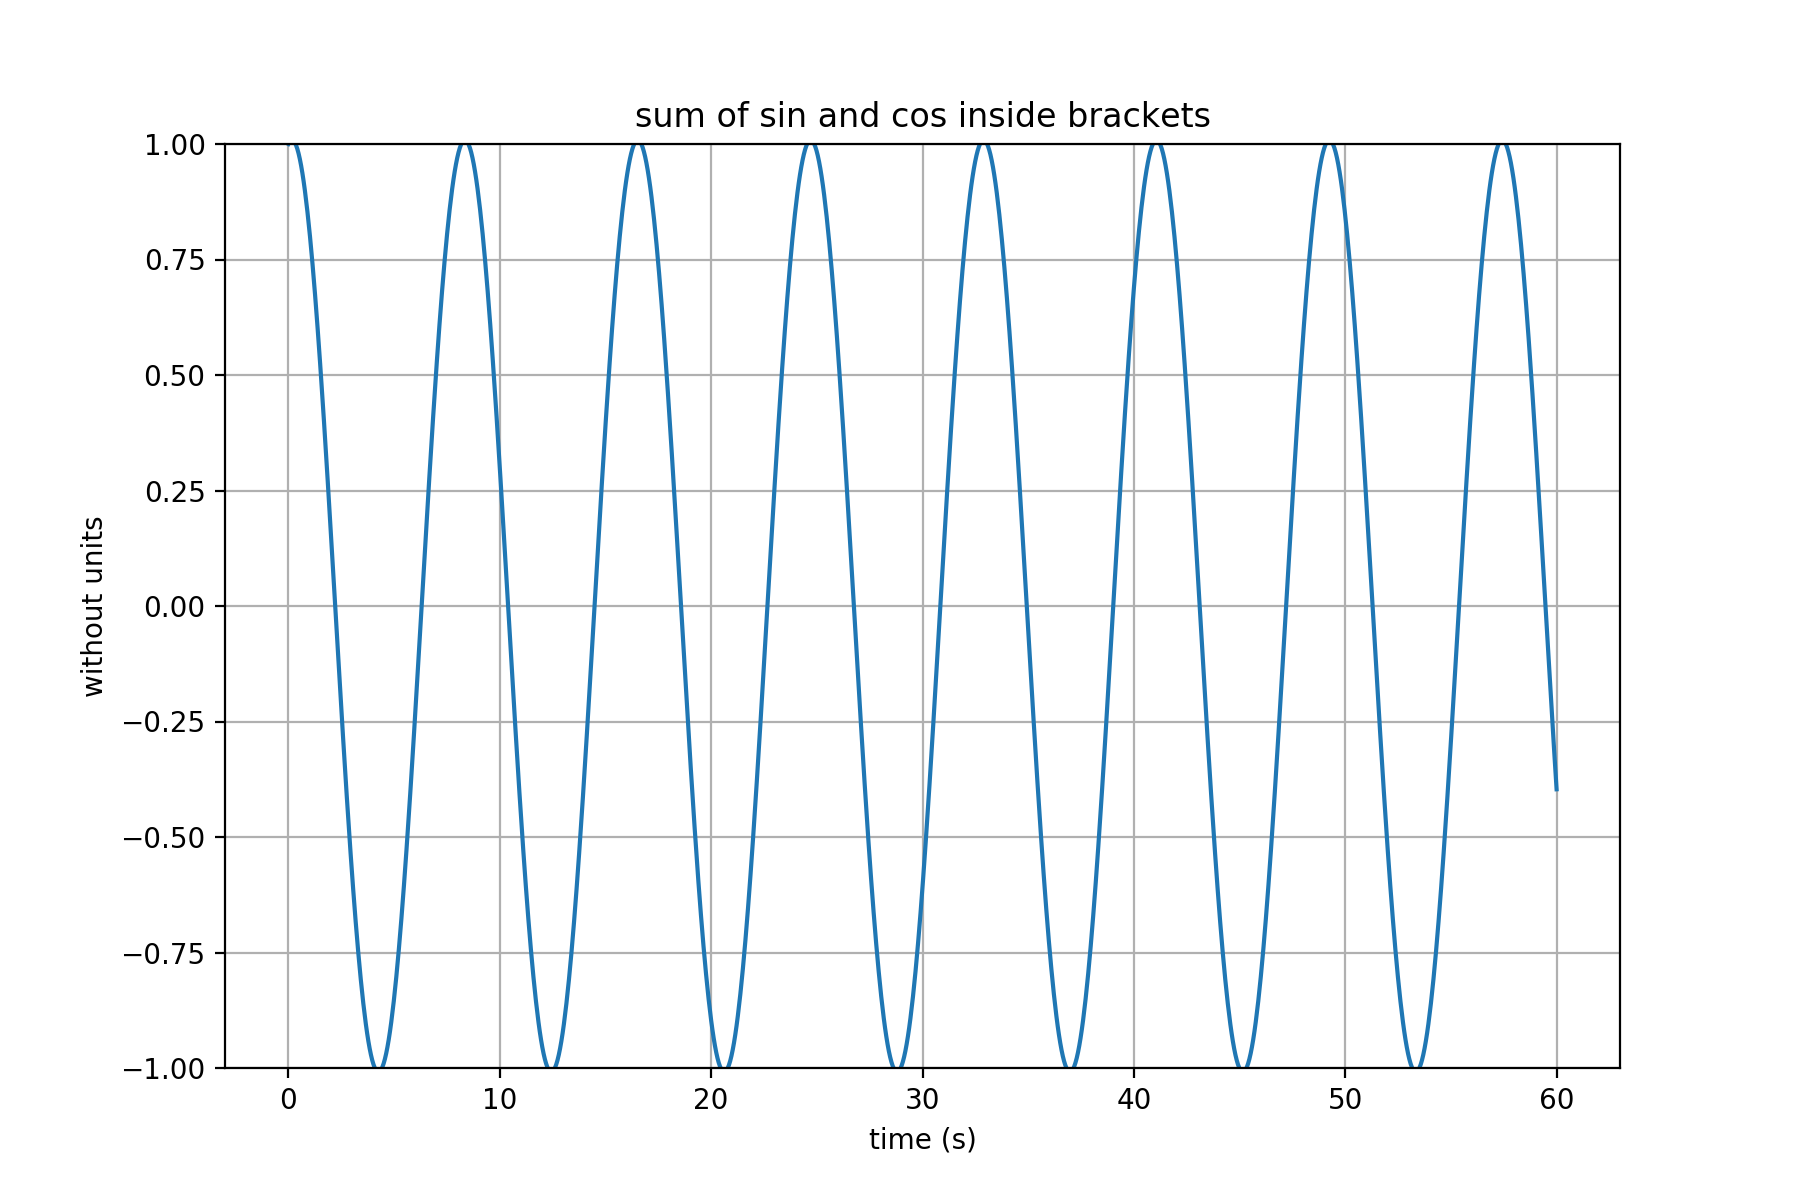

In [3]:
def tmp(t,x0 = x0):
    delta = mu/(2*m)
    omega_0 = np.sqrt(k/m)
    omega = np.sqrt(omega_0*omega_0 - delta*delta)
    x = np.cos(omega*t) + delta/omega*np.sin(omega*t)
    
    return x

#generate the data
tempt_ = np.linspace(0,60,1000)
tempx_ = np.array([tmp(i) for i in t_analytic])

fig = plt.figure(figsize=(9,6))
plt.title("sum of sin and cos inside brackets")

#fig, ax = plt.subplots(1, figsize=(9, 6))
#ax = fig.add_subplot(1,1,1, title="Damping exact solution")
plt.grid()
plt.ylim(-1,1)

plt.ylabel("without units")
plt.xlabel("time (s)")

plt.plot(tempt_,tempx_)

Obviously the term $x_0 e^{-\delta t}$ shapes the above function decreasing its value as the time increases.

## Numerical Integration

Not always we can solve a differential equation analitically, for instance the error function:

\begin{equation}
erf(x) = \frac{1}{\sqrt{\pi}} \int_{-x}^{x} e^{-t^2}dt
\end{equation}

or written in another way

\begin{equation}
\frac{d}{dx} erf(x)= \dot{erf} = \frac{2}{\sqrt{\pi}} e^{-x^2}
\end{equation}

Here I will investigate several numerical procedures to find solutions on numerical equations. Later on I will compare the numerical solution to the analytical solution we found for the damped oscillator. This way I will know which methods are best to have lower error.

To solve numerically first we will explain each method with a generic function:

\begin{equation}
\dot{x}(t) = f(t,x(t))
\end{equation}

Given $x(0) = x_0$.

This is, we get the derivative of the function in one part of the equation. For our damped equation we need to make some changes to get to this form. First we call $\dot{x} = v$ having:

\begin{eqnarray*}
\dot{v} + \frac{\mu}{m} v + \frac{k}{m}x &=& 0\\
\dot{v} &=& -\left[\frac{\mu}{m} v + \frac{k}{m}x\right]\\
\dot{v} &=& f(v,x,t)
\end{eqnarray*}


Every integration method needs that we discretize the equuation. Remember! you computer can only sum (or sum the oposite, i.e. substract) so the first thing is to discretize the variable over which we integrate (in our case is $t$).

\begin{equation}
t_{t+1} = t_t + \Delta t
\end{equation}

And thus, the discretized equation reads:

\begin{equation}
\frac{v_{t+1} - v_{t}}{\Delta t} = f(v_t,x_t,t)
\end{equation}

### Euler Method

This method is the simplest one. Remember we have defined $\dot{x} = v$ so

\begin{equation}
\hat{v}_t=\frac{\hat{x}_{t+1} - \hat{x}_t}{\Delta t}
\end{equation}

From here we can get the evolution of $x$ as

\begin{equation}
\hat{x}_{t+1} = \hat{x}_{t} + \Delta t \hat{v}_{t}
\end{equation}

From the last equation in the past section $(v_{t+1} - v_{t})/\Delta t = f(v_t,x_t,t)$ we can expand to

\begin{equation}
\hat{v}_{t+1} = \hat{v}_t - \Delta t\left[\frac{\mu}{m} \hat{v}_t + \frac{k}{m}\hat{x}_t \right]
\end{equation}

putting it all toghether we have to solve:

\begin{eqnarray*}
\hat{x}_{t+1} &=& \hat{x}_{t} + \Delta t \hat{v}_{t}\\
\hat{v}_{t+1} &=& v_t - \Delta t\left[\frac{\mu}{m} \hat{v}_t + \frac{k}{m}\hat{x}_t \right]\\
\hat{x}(t = 0) &=& 1 \\
\hat{v}(t = 0) = \dot{x}(t = 0) &=& 0
\end{eqnarray*}

In [4]:
def f(v,x,mu = mu,m = m, k = k):
    r = -(mu*v + k*x)/m
    return r

In [5]:
def Euler(f,deltat,t0 = t0,tf = tf,x0 = x0, v0 = v0):
    t = np.array([t0],dtype=np.float128)
    x = np.array([x0],dtype=np.float128)
    v = np.array([v0],dtype=np.float128)
    
    while t[-1] < tf:
        v = np.append(v,v[-1]+deltat*f(v[-1],x[-1]))
        x = np.append(x,x[-1]+deltat*v[-2])
        t = np.append(t,t[-1]+deltat)
        
    return x,t,v

x_,t_,v_ = Euler(f,deltat = 0.1)

<IPython.core.display.Javascript object>


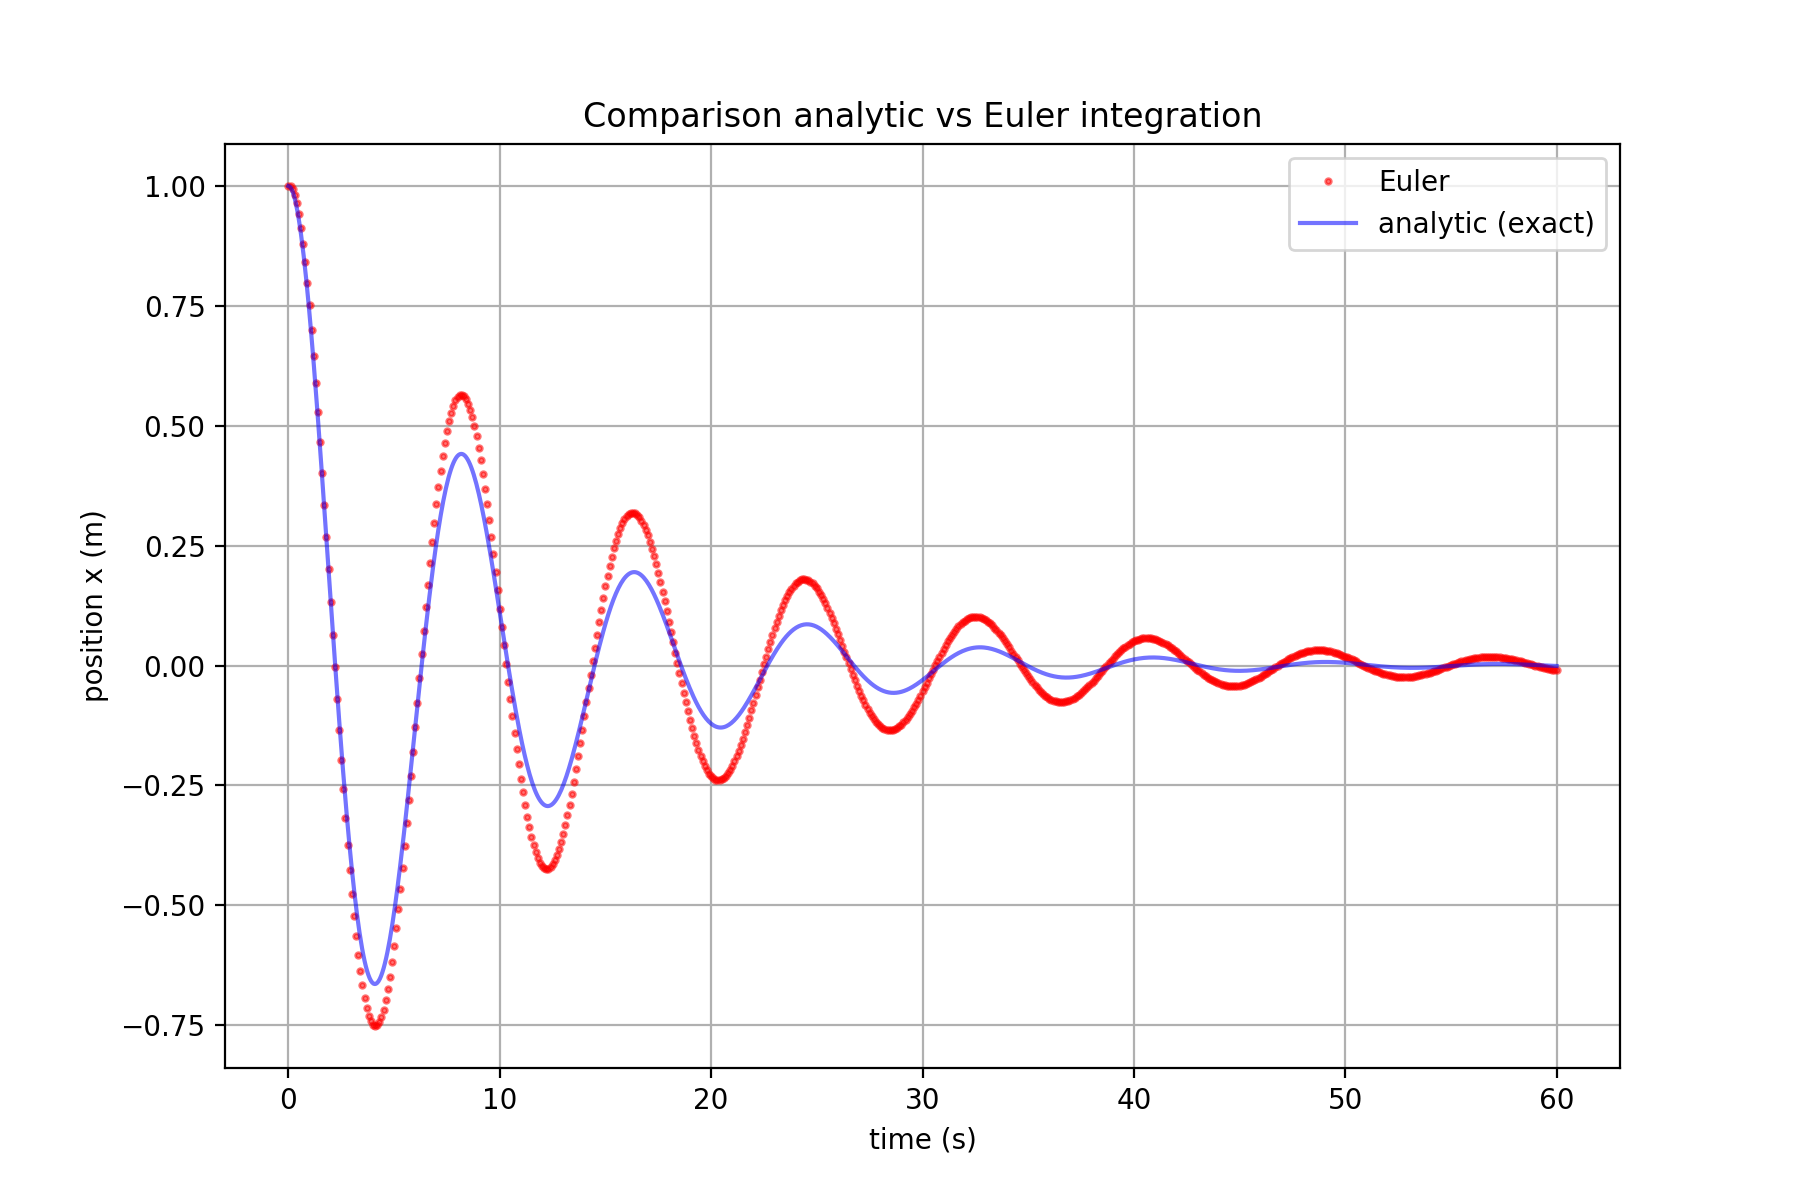

In [6]:
fig = plt.figure(figsize=(9,6))
plt.title("Comparison analytic vs Euler integration")

#fig, ax = plt.subplots(1, figsize=(9, 6))
#ax = fig.add_subplot(1,1,1, title="Damping exact solution")
plt.grid()
#plt.ylim(-1,1)

plt.ylabel("position x (m)")
plt.xlabel("time (s)")

plt.plot(t_,x_,'ro',alpha=0.55,markersize=2,label = "Euler")
plt.plot(t_analytic,x_analytic,'b-',alpha=0.55,markersize=2,label="analytic (exact)")
plt.legend()

#plt.plot(t_,v_)

There's obviously a difference between the Euler integration and the anlytic. We can solve this by decreasing the integration step.

<IPython.core.display.Javascript object>


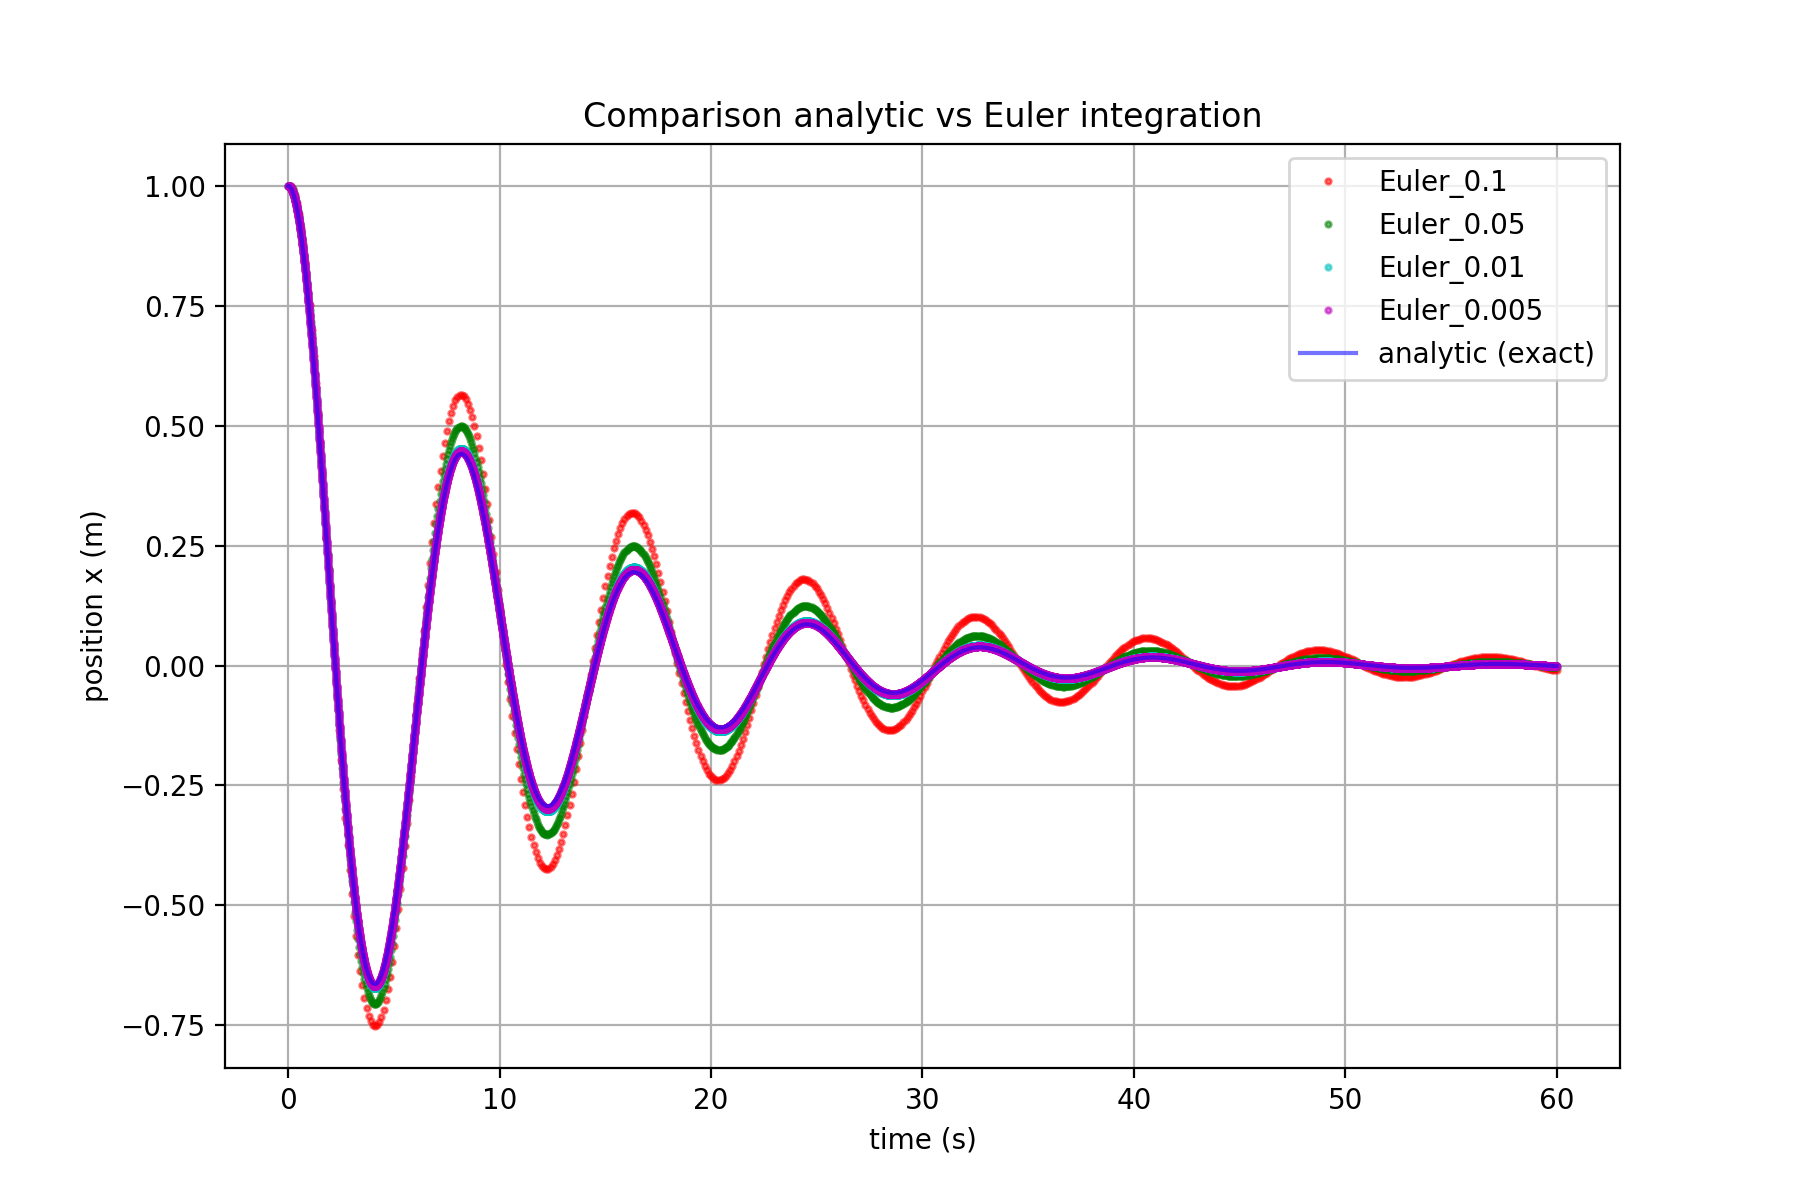

In [7]:
step = dict()

x_1,t_1,v_1 = Euler(f,deltat = 0.1)
x_2,t_2,v_2 = Euler(f,deltat = 0.05)
x_3,t_3,v_3 = Euler(f,deltat = 0.01)
x_4,t_4,v_4 = Euler(f,deltat = 0.005)

fig = plt.figure(figsize=(9,6))
plt.title("Comparison analytic vs Euler integration")

plt.grid()
plt.ylabel("position x (m)")
plt.xlabel("time (s)")

plt.plot(t_1,x_1,'ro',alpha=0.55,markersize=2,label = "Euler_0.1")
plt.plot(t_2,x_2,'go',alpha=0.55,markersize=2,label = "Euler_0.05")
plt.plot(t_3,x_3,'co',alpha=0.55,markersize=2,label = "Euler_0.01")
plt.plot(t_4,x_4,'mo',alpha=0.55,markersize=2,label = "Euler_0.005")

plt.plot(t_analytic,x_analytic,'b-',alpha=0.55,markersize=2,label="analytic (exact)")
plt.legend()

The smaller the step the smaller the error as we expected. In the above image you can zoom in and see the curves.

The Euler method is not recomended in general because is not very accurate when we compare to other methods and is in general not very stable (there are cases when solving the differential equation the error accumulates and the solution becomes completely random). Euler's method is of order $O(\Delta_t^2)$.

### Runge Kutta Methods

There are many Runge Kutta methods of several orders of magnitude for the error. All of them are built considering the n-th Taylor expansion of the variable we want to integrate:

\begin{equation}
v(t+\Delta t) = v(t) + \Delta t \dot{v} + \frac{\Delta t^2}{2!} \ddot{v} + \frac{\Delta t^3}{3!} \dddot{v} + O(\Delta t^4)
\end{equation}

where as before, the first derivative is:

\begin{equation}
\dot{v} = f(v_t,x_t,t)
\end{equation}

The second and third derivatives can be worked out from the first. The order of the Taylor expansion determines the Runge Kutta error.

#### Runge Kutta 2

From the book *Numerical Recipes by William H. Press et al.* we get the derived Runge Kutta equations for order 2, error $O(\Delta_t^3)$

\begin{eqnarray}
k_1 &=& \Delta t f(v_t,x_t,t) \\
k_2 &=& \Delta t f()
\end{eqnarray}